## 지도학습 - 분류형
- target 기준 이항, 다항으로 나눔

In [2]:
import pandas as pd
df_TFD = pd.read_csv("TitanicFromDisaster_train.csv")
df_TFD[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df_TFD.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 데이터
- 목표변수(target) : Pclass
- 설명변수 (feature) : 'Survived','Age','Fare'
- 모델링 하기 전에 범주형 데이터의 값이 문자일 경우 숫자로 변환을 해줘야 한다.

In [4]:
df_TFD['Pclass'].unique()

array([3, 1, 2])

In [6]:
df_TFD_extract = df_TFD.loc[:,['Pclass', 'Survived','Age','Fare']].dropna()
df_TFD_extract.isnull().sum()

Pclass      0
Survived    0
Age         0
Fare        0
dtype: int64

In [ ]:
df_TFD_extract[:2]

,Survived,Pclass,Age
0,0,3,22.0
1,1,1,38.0


### 정형화 단계 - target과 feature 분리

In [8]:
target_train = df_TFD_extract['Pclass'] # 목표변수
feature_train = df_TFD_extract.drop(columns=['Pclass']) # 설명변수
target_train.shape, feature_train.shape

((714,), (714, 3))

## 모델

In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# model = DecisionTreeClassifier(max_depth=3)
# 더 큰 max_depth 값은 모델이 더 복잡한 관계를 학습할 수 있지만, 이는 과적합의 위험을 증가시킬 수 있습니다.
# 작은 max_depth 값은 모델을 더 간단하게 만들고, 일반화 성능을 향상시킬 수 있습니다. 하지만, 너무 작은 max_depth 값은 모델의 표현력을 제한할 수 있습니다.
model

DecisionTreeClassifier()

In [25]:
model.fit(feature_train,target_train)

DecisionTreeClassifier()

### 모델 내부 동작 그래프

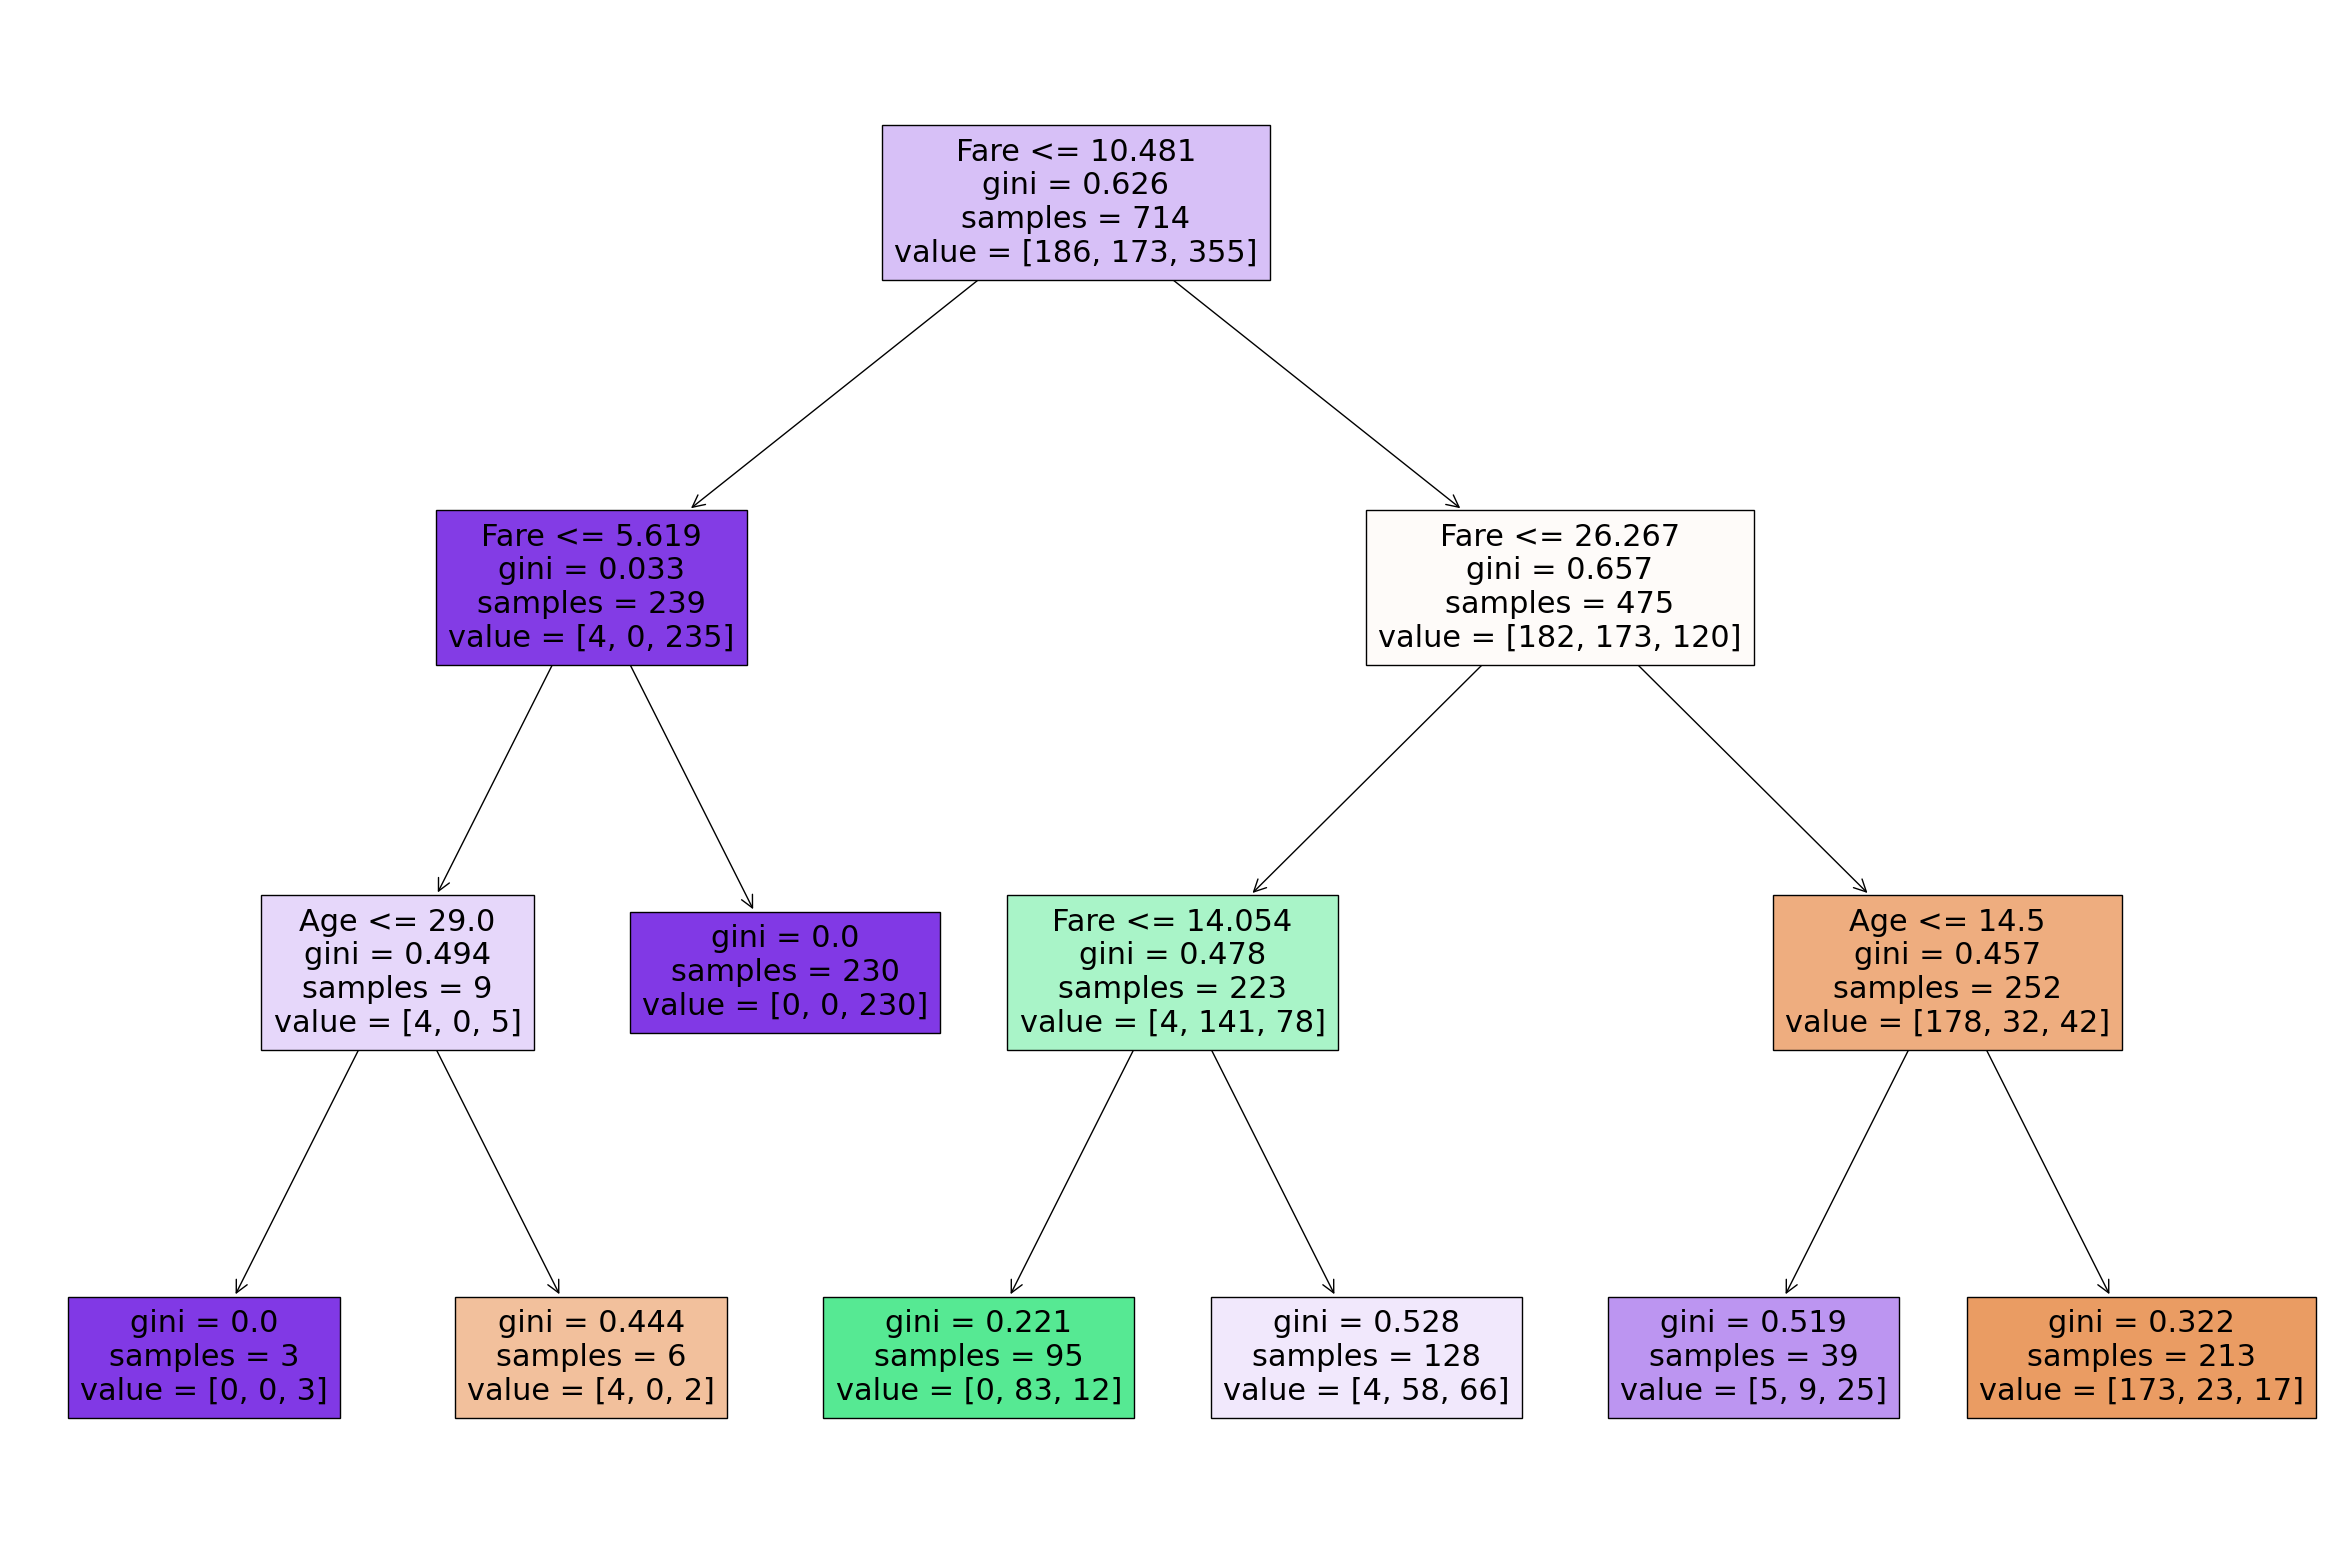

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
feature_train.columns.to_list() #리스트로 바꾸고 plot_tree에 넣어야함
plt.figure(figsize=(30,20))
plot_tree(model, feature_names=feature_train.columns.to_list(), filled=True) # filled=True
plt.show()

## 평가

In [13]:
df_TFD_extract[10:14]

,Pclass,Survived,Age,Fare
11,1,1,58.0,26.5500
12,3,0,20.0,8.0500
13,3,0,39.0,31.2750
14,3,0,14.0,7.8542


In [14]:
model.predict(feature_train[10:14])
# 실제 값 : 1, 3, 3, 3 / 결과값 : 1, 3, 3, 3

array([1, 3, 3, 3])

In [15]:
model.predict_proba(feature_train[10:14]) # 확률값

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

### 평가 수치
- 정확도
-

In [16]:
# 정확도
from sklearn.metrics import accuracy_score
target_train_predict = model.predict(feature_train)
target_train_predict.shape, target_train.shape

((714,), (714,))

In [17]:
accuracy_score(target_train, target_train_predict)

1.0